In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('seaborn-ticks')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 16

# Categories in wikipedia

In [49]:
ds = pd.read_csv('data/eswikicats.csv', names=['pages', 'categories'])
print(ds.shape)

(36, 2)


In [2]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


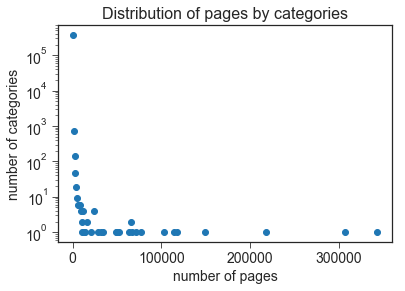

In [43]:
ind = np.arange(len(ds))
width=0.5
#plt.bar(ind+width, )
plt.figure(figsize=(6,4))
plt.scatter(ds.pages, ds.categories)
plt.yscale('log')
#plt.xscale('log')
plt.title('Distribution of pages by categories')
plt.xlabel('number of pages')
plt.ylabel('number of categories')
#plt.tight_layout()
plt.savefig('output/dpagecat.png', bbox_inches='tight')

In [110]:
dstop_cat = pd.read_csv('data/eswiki_topcategories.csv', 
                 names=['cat_id', 'cat_title','cat_pages','cat_subcats','cat_files'])
print(dstop_cat.shape)
dstop_cat_tp = pd.read_csv('data/eswiki_topcategories_talkpages.csv', 
                 names=['cat_title','cat_pages'])
print(dstop_cat_tp.shape)

def format_title(dscol):
    title=dscol.str.replace('Wikipedia:', '')
    title=title.str.replace('_', ' ')
    title=title.str.replace('Artículos con ', '')
    title=title.str.replace('Páginas con ', '')
    return title
    
cat_titles = format_title(dstop_cat.cat_title)
cat_titles_tp = format_title(dstop_cat_tp.cat_title)

print(cat_titles)

cat_titles = ['C'+str(i) for i in range(len(cat_titles))]
#cat_titles = cat_titles[::-1]
cat_titles

(10, 5)
(10, 2)
0                     datos locales
1    datos por trasladar a Wikidata
2                           Hombres
3                    Personas vivas
4              ficha sin actualizar
5              identificadores VIAF
6           enlaces mágicos de ISBN
7              identificadores LCCN
8           coordenadas en Wikidata
9              identificadores ISNI
Name: cat_title, dtype: object


['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

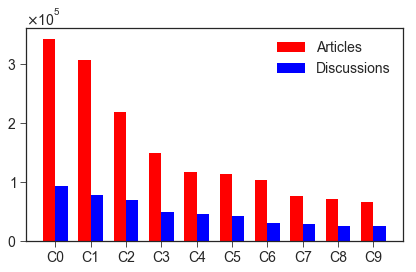

In [122]:
width = 0.35
N=len(dstop_cat)
ind = np.arange(N)

fig, ax = plt.subplots()
#fig.figure(figsize=(10,5))
#dstop_cat.cat_pages.plot.bar()
rects1=ax.bar(ind, dstop_cat.cat_pages,width, color='r')
rects2=ax.bar(ind+width, dstop_cat_tp.cat_pages,width, color='b')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(cat_titles)
ax.legend((rects1[0], rects2[0]), ('Articles', 'Discussions'))
#plt.xscale('log')
# plt.yscale('log')

xfmt = matplotlib.ticker.ScalarFormatter(useMathText=True)
xfmt.set_powerlimits((-3,3))
ax.yaxis.set_major_formatter(xfmt)

#plt.ticklabel_format(style='sci', axis='y', scilimits=(1,1))
plt.tight_layout()
plt.savefig('output/top_categories.eps', format='eps')

## Correlation between the number articles and discussions in each category

In [123]:
np.corrcoef(dstop_cat.cat_pages, dstop_cat_tp.cat_pages)

array([[ 1.        ,  0.98183856],
       [ 0.98183856,  1.        ]])